# Datensatz 2 (Schrauben)

## Bilder aus Video extrahieren

Die folgenden Videos wurden unter möglichst gleichen Bedingungen aufgenommen, so dass die Trainingsbilder sich nur durch die Schrauben unterscheiden.

````
# OpenCV importieren:
import cv2

# path = 'relativer Speicherpfad / Dateiname':
path = 'frames_from_video/torx'


# Video laden:
cap = cv2.VideoCapture('video/torx.MOV')
i = 0


# Prüfen ob ein Video geladen wurde:
if cap.isOpened() == False:
    print('ERROR: Datei nicht gefunden')
   
    
# Die Frames des Videos lesen:      
while(cap.isOpened()):
    ret, frame = cap.read()
     
    # sobald keine Frames mehr gelesen werden können (ret==False) wird abgebrochen:
    if ret == False:
        break
     
    # Die Frames speichern
    cv2.imwrite(path+str(_i)+'.jpg', frame)
    i += 1
 
cap.release()
cv.destroyAllWindows()
````

Die Frames des Videos wurden extrahiert und gespeichert. Da die Bilder Bevor die Bilder mit Tensorflow

Schneiden und skalieren Sie das Bild auf die richtige Größe und normalisieren Sie die Farben. Alle in Keras enthaltenen vortrainierten Netze erfordern, dass die Eingabedaten quadratisch und in einer bestimmten Größe vorliegen. Außerdem erwarten sie, dass die Farbkanäle normalisiert sind. Die Normalisierung der Bilder für das Training erleichtert dem Netzwerk, sich auf die wichtigen Dinge zu konzentrieren und sich dabei nicht »ablenken« zu lassen.
Osinga, Douwe. Deep Learning Kochbuch : Praxisrezepte für einen schnellen Einstieg, o'Reilly, 2019. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/htwg-konstanz/detail.action?docID=5704334.
Created from htwg-konstanz on 2022-02-16 00:04:42.

In [2]:
# importieren der Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Bildausschnitt

Wir können PIL/Pillow verwenden, um ein Bild zu laden und die Bildmitte auszuschneiden:
Osinga, Douwe. Deep Learning Kochbuch : Praxisrezepte für einen schnellen Einstieg, o'Reilly, 2019

```python

from PIL import Image

img = Image.open('frames_from_video/pozidriv0.jpg')
plt.imshow(img)
w, h = img.size 
s = min(w, h) 
y = (h - s) // 2 
x = (w - s) // 2 
img_crop = img.crop((x, y, s, s))
plt.imshow(img_crop)
print("w = " + str(w))
print("h = " + str(h))
print("s = " + str(s))
print("y = " + str(y))
print("x = " + str(x))
# Osinga, Douwe. Deep Learning Kochbuch : Praxisrezepte für einen schnellen Einstieg, o'Reilly, 2019

```

## Bild verkleinern

```python
import cv2

img = cv2.imread('frames_from_video/pozidriv0.jpg', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',img.shape)

scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

#resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

```python
import glob
import numpy as np
from PIL import Image
filelist = glob.glob("screw_img/**/*")
X_raw = np.array([np.array(Image.open(fname)) for fname in filelist])
print(X_raw.shape)
print(len(filelist))

# Array erweitern - hier nicht nötig
#X_raw = X_raw.reshape(X_raw.shape + (1,))
#print(X_raw.shape)
```

```python
filelist = glob.glob("screw_img/**/*")
X_gray = np.array([np.array(Image.open(fname).convert('L')) for fname in filelist])
print(X_gray.shape)
print(len(filelist))
```

```python
# Array erweitern 
#X_gray = X_gray.reshape(X_gray.shape + (1,))
print(X_gray.shape)
```

## Auto Object Cropping (YOLOv4)

Wie das YOLO Netzwerk dafür genutzt werden kann Objekte auf Bildern auszuschneiden: ["Video: Crop and Save"](https://www.youtube.com/watch?v=P7r0hIP2GQ4)  
Den Code: [Github](https://github.com/theAIGuysCode/yolov4-custom-functions)

## Beispiel Bilder anzeigen

In [3]:
pozidriv = mpimg.imread('screw_img_224x224/pozidriv/pozi (1288).jpg')
kreuzschlitz = mpimg.imread('screw_img_224x224/kreuzschlitz/kreuzschlitz (1592).jpg')
philips = mpimg.imread('screw_img_224x224/philips/philips (1148).jpg')
innensechskant = mpimg.imread('screw_img_224x224/innensechskant/innensechskant (1).jpg')
sechskant = mpimg.imread('screw_img_224x224/sechskant/sechskant (1334).jpg')
torx = mpimg.imread('screw_img_224x224/torx/torx (1178).jpg')

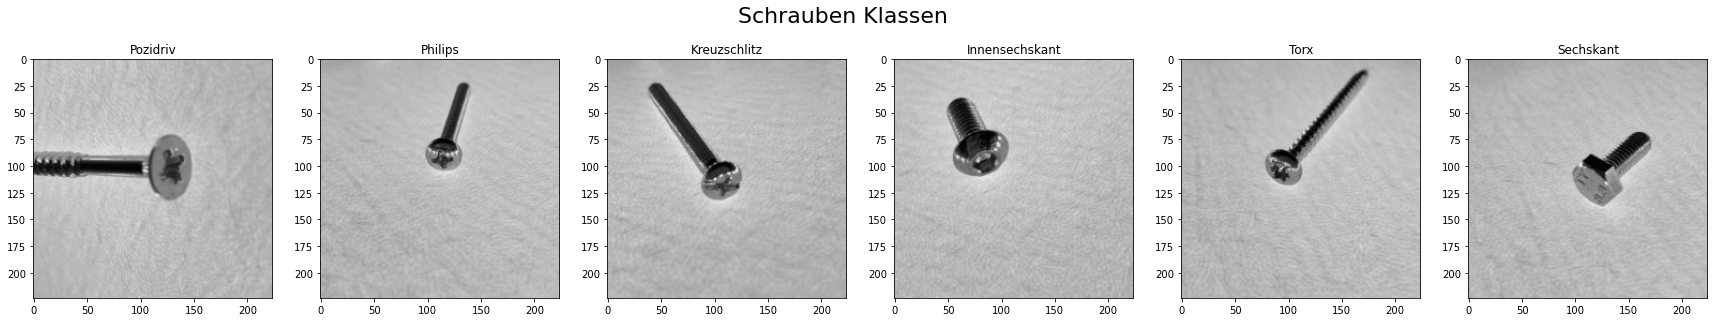

In [4]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 6, 1)
plt.title('Pozidriv')
plt.imshow(pozidriv, cmap='gray')

plt.subplot(1, 6, 2)
plt.title('Philips')
plt.imshow(philips, cmap='gray')

plt.subplot(1, 6, 4)
plt.title('Innensechskant')
plt.imshow(innensechskant, cmap='gray')

plt.subplot(1, 6, 5)
plt.title('Torx')
plt.imshow(torx, cmap='gray')

plt.subplot(1, 6, 6)
plt.title('Sechskant')
plt.imshow(sechskant, cmap='gray')

plt.subplot(1, 6, 3)
plt.title('Kreuzschlitz')
plt.imshow(kreuzschlitz, cmap='gray')

plt.suptitle('Schrauben Klassen', fontsize=22)
#plt.subplots_adjust(left=0.3, wspace=0.2, top=0.8)
plt.show()

Aus diesen 5 Schraubenarten wird nun ein Datensatz mit Labels erstellt.

In diesem Abschnitt soll ein Datensatz aus "echten" Fotos erstellt werden.

Wie viele Trainingsdaten benötigt das Netz? Sind [genug Trainingsdaten](https://towardsdatascience.com/how-do-you-know-you-have-enough-training-data-ad9b1fd679ee) vorhanden?

:::{note}
Es stellt sich die Frage wie detailreich die Schraubenbilder sein müssen um eine gute Erkennung zu ermöglichen?
:::

Um kostengünstig und schnell eine vielzahl an Trainingsbildern von Schrauben zu erzeugen, bieten sich Videoaufnahmen der Schrauben an. Die Videoaufnahmen lassen sich in einzelne Bildern zerlegen und somit ein Datensatz erzeugen.

## Alle Bilder in einem Ordner

Die Labelliste muss dem Image-Array korrekt zugeordnet werden. Dafür müssen Bilder und zugehörige Labels in gleicher Reihenfolge abgespeichert werden.

In [ ]:
import glob
import numpy as np
from PIL import Image

````
# Liste mit Dateipfad anlegen
filelist = glob.glob("frames_from_video/*")

# Bilder in ein 3 Dimensionales Numpy Array speichern
X = np.array([np.array(Image.open(fname)) for fname in filelist])

# Array erweitern auf 4D-Array (n,n,n,1)
X = X.reshape(X.shape + (1,))
````

In [ ]:
print(X.shape)

Das Bilder Array **X** wurde nun erstellt. Nun müssen noch die zugehörigen *Labels* erzeugt werden.

Folgende Ausgangssituationen sollen untersucht werden:
  1. Alle Bilder liegen in einem Ordner und jedes Bild besitzt Klassenname und Nummerierung im Dateinamen
  2. Jede Klasse in einem eigenen Ordner, Dateinamen benötigen lediglich eine fortlaufende Nummerierung

```python
import os

path = "dataset_from_video"
categories = [] 

for img in os.listdir(path):  # hole mir die Bezeichnung aus dem Dateinamen des Bildes, teile den Dateinamen am Leerzeichen (" ") und nutze den Klassennamen als Label
    if img.startswith("innensechskant"):
        category_, rand_str = img.split(' ') # teile auf in "innensechskant" und "28x28_gray"
        categories.append(category_)# erweitere die Labelliste mit "innensechskant"
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("philips"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("pozidriv"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("sechskant"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
            
for img in os.listdir(path):  # iterate over each image per Categorie
    if img.startswith("torx"):
        category_, rand_str = img.split(' ')
        categories.append(category_)
        
y=categories
print(y)
```

```python
# Label Test
i=3
print(y[i])
plt.imshow(X[i],cmap='gray')
plt.show
```

## Bilderklassen in separatem Ordner

Die folgende Ordnerstruktur liegt vor:

main_directory/  
...category_a/  
......a_image_1.jpg  
......a_image_2.jpg  
...category_b/  
......b_image_1.jpg  
......b_image_2.jpg  

```python
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = 'C:/Users/Martin/OneDrive/Masterthesis_2022/01_Dataset/ImageDataset_Classes'

CATEGORIES = ['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break  
    break
    
```

```python
training_data = []

IMG_SIZE=224


def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
```

```python
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
```

## Datensatz aufteilen in Test- und Trainingsdaten

```python
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
```

```python
from numpy import save, load
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('Dataset_224x224/X_train.npy', X_train)
save('Dataset_224x224/y_train.npy', y_train)
save('Dataset_224x224/X_test.npy', X_test)
save('Dataset_224x224/y_test.npy', y_test)

```

## Datensatz mit Keras erzeugen und erweitern

Mit dem ImageDataGenerator aus dem Keras Paket *Image data preprocessing*, kann ein Datensatz erstellt werden.
Der Image Data Generator bietet eine Reihe nützlicher Funktionen um einen Datensatz aus Bildern zu erstellen und zu erweitern.

import tensorflow
from tensorflow import keras

```python
# Create a dataset.
dataset = keras.preprocessing.image_dataset_from_directory(
  'screw_img', batch_size=100, image_size=(224, 224))

data = []
labels = []




# For demonstration, iterate over the batches yielded by the dataset.
for data, labels in dataset:
    print(data.shape)  # (64, 200, 200, 3)
    print(data.dtype)  # float32
    print(labels.shape)  # (64,)
    print(labels.dtype)  # int32
    break
    
```   

```python
X_ = []
y_ = []

for features,label in dataset:
    X_.append(features)
    y_.append(label)
```

In [ ]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(X.shape)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
class_names = X.class_names
print(len(class_names))

## Generator ausprobieren und konfigurieren:

In [ ]:
#Generator config:
gen = ImageDataGenerator (
    #width_shift_range=0,
    #height_shift_range=0,
    #rotation_range=0,
    #shear_range=0.01,
    #zoom_range=0.2,
    #fill_mode='constant',cval=255 # beste fill mode bei einfarbigen Hintergrund
)
# generate one image:
for batch in gen.flow(
    X_raw,
    shuffle=False,
):
    #print(batch.shape)
    plt.imshow(batch[0]/255)
    plt.show
    break
    
print(batch.shape)

In [ ]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    brightness_range=None,
    shear_range=0,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=255,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)




itr = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=10,
    shuffle=False,
    seed=None,
    save_to_dir='Dataset_vid',
    #save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
    
    
#target_size=(img_width, img_height),
#batch_size=10,
#class_mode='categorical')

i=0

for i in range(0,3):
    X, y = itr.next()
    

```
from numpy import save, load
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('Dataset_vid/X_train.npy', X_train)
save('Dataset_vid/y_train.npy', y_train)
save('Dataset_vid/X_test.npy', X_test)
save('Dataset_vid/y_test.npy', y_test)
```